<!---------------------------------------------->
<!-----------------ANA BAŞLIK------------------->
<!---------------------------------------------->
<center> <h1 style="background-color:black; color:white"><br> Exploratory Data Analysis Amazon Reviews <br></h1></center>


<!---------------------------------------------->
<!------------------AÇIKLAMA-------------------->
<!---------------------------------------------->
<br>
Amazon Alexa, also known simply as Alexa, is a virtual assistant technology developed by Amazon, first used in the Amazon Echo smart speaker and the Echo Dot, Echo Studio and Amazon Tap speakers developed by Amazon Lab126. It is capable of voice interaction, music playback, making to-do lists, setting alarms, streaming podcasts, playing audiobooks, and providing weather, traffic, sports, and other real-time information, such as news. Alexa can also control several smart devices using itself as a home automation system. Users are able to extend the Alexa capabilities by installing "skills" (additional functionality developed by third-party vendors, in other settings more commonly called apps) such as weather programs and audio features. It uses NLU (natural language understanding), speech recognition and other weak AI to perform these tasks.<br /><br />


<!---------------------------------------------->
<!------------VERİ SETİ HAKKINDA BİLGİ---------->
<!---------------------------------------------->

<center> <h1 style="background-color:black; color:white" ><br> About dataset<br></h1></center>
<br>
This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. for learning how to train Machine for sentiment analysis. 
<br><br>


<!---------------------------------------------->
<!-----VERİ SETİ DEĞİŞKENLERİ HAKKINDA BİLGİ---->
<!---------------------------------------------->

<p>
- <b>Rating:</b>This column includes votes cast by users. (1-5)<br />
- <b>Date:</b>This column shows on what date users voted.<br />
- <b>Variation</b>This column shows which product has been commented on.<br />
- <b>Verified_rewiews</b>User comments<br />
- <b>Feedback</b>This column indicates whether user comments are positive or negative. 1 is positive comment, 0 is negative comment.<br />
</p>

<!---------------------------------------------->
<!------------------GÖRSEL---------------------->
<!---------------------------------------------->

<center><img src="https://www.mytrendyphone.eu/images/Amazon-Echo-Dot-3-Smart-Speaker-with-Alexa-and-Alarm-Clock-Black-0841667160306-17112020-01-p.jpg" style="width:20%;height:10%;"></center>
<!---------------------------------------------->
<!-------------------TABLO---------------------->
<!---------------------------------------------->
<br>    
<center>    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action" style="background-color:black; color:white" data-toggle="list"  role="tab" aria-controls="home"><br>Notebook Content!<br></h3>  
  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" style="color:black">Exploratory Data Analysis<span        class="badge badge-primary badge-pill" style="background-color:black; color:white">1</span></a>
  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="profile" style="color:black">Data Cleaning and Feature Engineering<span        class="badge badge-primary badge-pill" style="background-color:black; color:white">2</span></a>
  
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#3" role="tab" aria-controls="settings" style="color:black">Model Tuning and Result<span class="badge badge-primary badge-pill" style="background-color:black; color:white">3</span></a></center>
   

<a id='1'></a><center> <h1 style="background-color:black; color:white" ><br>Exploratory Data Analysis<br></h1>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls                             
from collections import Counter                        
import plotly.figure_factory as ff

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [4]:
df= pd.read_csv("C:/Users/user/Desktop/project dataset/amazon_alexa.tsv", sep="\t")


In [8]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# How many alexa products does amazon have? i.e unique amazon alexa products variations
df['variation'].nunique()

16

Amazon Alexa has 16 different products variation 

In [7]:
# How many comments have been made about the different variations?
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

Above, we can see the different variations of Alexa products and the number of reviews that has been given to each of the variations

<AxesSubplot:xlabel='variation', ylabel='count'>

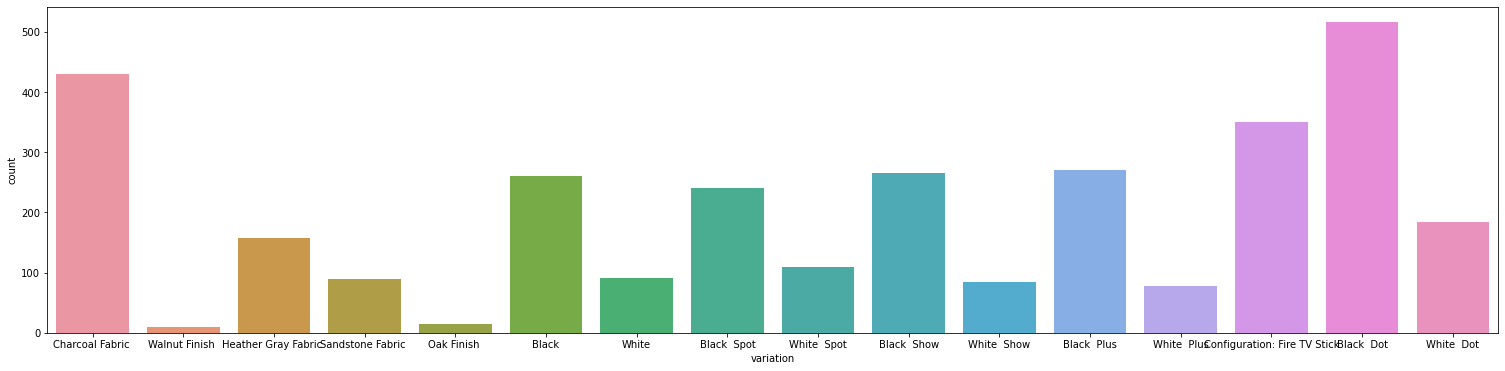

In [8]:
#visualise the number of feedback per variation
fig, ax = plt.subplots(figsize=(26, 6))
sns.countplot(x="variation",data=df)

In [9]:
# what product got the highest reviews 
df.groupby('variation').agg({"rating":"mean"}).sort_values('rating', ascending = False).head()

,rating
variation,
Walnut Finish,4.888889
Oak Finish,4.857143
Charcoal Fabric,4.730233
Heather Gray Fabric,4.694268
Configuration: Fire TV Stick,4.591429


The product with the highest rating is Walnut Finish with 4.88 rating votes 

In [10]:
# What is the distribution of the feedbacks? 1 denotates a positive feedback whole 0 is a negative feedback 
df["feedback"].value_counts().head()

1    2893
0     257
Name: feedback, dtype: int64

There are 2893 positive feedbacks and 257 negative feedbacks. 

In [11]:
# visulaise the distribution of the feedback
trace0 = go.Bar(
            x = df[df["feedback"]== 1]["feedback"].value_counts().index.values,
            y = df[df["feedback"]== 1]["feedback"].value_counts().values,
            name='Positive Feedback')

trace1 = go.Bar(
            x = df[df["feedback"]== 0]["feedback"].value_counts().index.values,
            y = df[df["feedback"]== 0]["feedback"].value_counts().values,
            name='Negative Feedback')


data = [trace0, trace1]
layout = go.Layout(yaxis=dict(title='Count'),
                   xaxis=dict(title='Feedback'),title='Feedback Distribution')

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig)

In [12]:
#visualise each a´variations feedback
trace0 = go.Bar(
            x = df[df["feedback"]== 1]["variation"].value_counts().index.values,
            y = df[df["feedback"]== 1]["variation"].value_counts().values,
            name='Positive Feedback')

trace1 = go.Bar(
            x = df[df["feedback"]== 0]["variation"].value_counts().index.values,
            y = df[df["feedback"]== 0]["variation"].value_counts().values,
            name='Negative Feedback')

data = [trace0, trace1]
layout = go.Layout(yaxis=dict(title='Count'),
                   xaxis=dict(title='Feedback'),title='Feedback distribution')


fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig)

The image above shows side by side feedback distribution for each product variations. 